# CS598 PSL — Assignment 1 — Problem 1

Group Members: Rahul Kasibhatla, Neeyati Devanagondi, Manas Gandhi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [5]:
train = np.loadtxt("pendigits.tra", delimiter=",")
test  = np.loadtxt("pendigits.tes", delimiter=",")

X_train = train[:, :-1]
Y_train = train[:, -1]
X_test  = test[:, :-1]
Y_test  = test[:, -1]

In [6]:
uin_first  = 0
uin_second = 1
d0, d1 = sorted((uin_first, uin_second))

train_mask = (Y_train == d0) | (Y_train == d1)
test_mask  = (Y_test  == d0) | (Y_test  == d1)

X_train = X_train[train_mask]
Y_train = (Y_train[train_mask] == d1).astype(int)
X_test  = X_test[test_mask]
Y_test  = (Y_test[test_mask] == d1).astype(int)

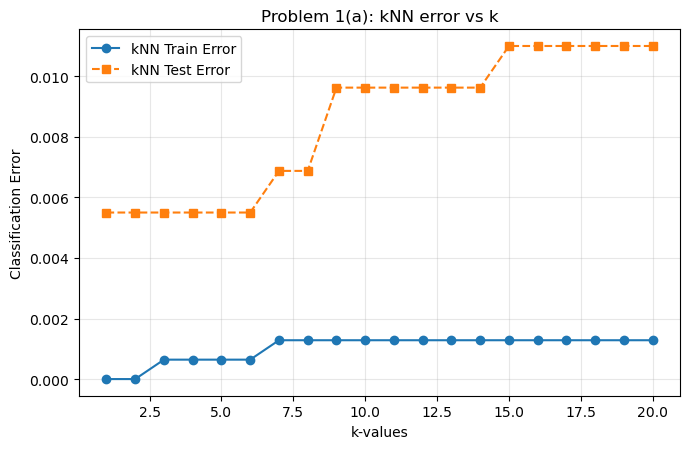

In [8]:
train_error = []
test_error  = []

for k in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    clf.fit(X_train, Y_train)
    train_error.append((clf.predict(X_train) != Y_train).mean())
    test_error.append((clf.predict(X_test)  != Y_test ).mean())

train_error = np.array(train_error)
test_error  = np.array(test_error)

plt.figure(figsize=(7, 4.6))
plt.plot(np.arange(1, 21), train_error, "-o", label="kNN Train Error")
plt.plot(np.arange(1, 21), test_error,  "--s", label="kNN Test Error")
plt.xlabel("k-values")
plt.ylabel("Classification Error")
plt.title(f"Problem 1(a): kNN error vs k")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

ks = np.arange(1, 21)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=598)

cv_error = []
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    acc = cross_val_score(clf, X_train, Y_train, cv=cv, scoring="accuracy")
    cv_error.append(1 - acc.mean())
cv_error = np.array(cv_error)

k_cv = int(ks[np.where(cv_error == cv_error.min())[0][0]])
dof_knn = len(X_train) / k_cv

clf = KNeighborsClassifier(n_neighbors=k_cv, metric="euclidean").fit(X_train, Y_train)
test_err_at_kcv = (clf.predict(X_test) != Y_test).mean()

lr = LinearRegression().fit(X_train, Y_train)
lr_train_pred = (lr.predict(X_train) >= 0.5)
lr_test_pred  = (lr.predict(X_test) >= 0.5)
lr_train_err  = (lr_train_pred != Y_train).mean()
lr_test_err   = (lr_test_pred  != Y_test ).mean()

dof_lr = X_train.shape[1] + 1
lr_cv_pred = cross_val_predict(LinearRegression(), X_train, Y_train, cv=5)
lr_cv_err  = 1 - accuracy_score(Y_train, (lr_cv_pred >= 0.5))

The plot does not show a clear U-shaped error curve. The test error stays low for small 𝑘 and then gradually increases as 𝑘 gets larger. This means the data does not strongly demonstrate the typical bias–variance tradeoff, since we don’t see the left side of the U where high variance would normally raise error.

**Linear Regression Results:**  
- Degrees of Freedom (DoF): 17  
- Training Error: 0.001  
- Test Error: 0.026  

**kNN Results:**  
- Optimal k: 1  
- Degrees of Freedom at optimal k: 1559  
- Test Error at optimal k: 0.006

# Problem 2

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

num = np.random.default_rng(598)
X = num.standard_normal((1000, 4))         
eps = num.standard_normal(1000)             
y = X[:, 0] + 2*X[:, 1] - X[:, 2] + eps   

X_train = X[:500]
Y_train = y[:500]
X_test  = X[500:]
Y_test = y[500:]

In [23]:
def mse(y_true, y_pred):
    y_true = np.asarray(y_true, float).ravel()
    y_pred = np.asarray(y_pred, float).ravel()
    return float(np.mean((y_true - y_pred)**2))

In [31]:
for k in [4, 5]:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, Y_train)
    yhat = knn.predict(X_test)
    print(f"k={k}: Test MSE = {mse(Y_test, yhat):.4f}")

k=4: Test MSE = 1.4327
k=5: Test MSE = 1.4437


In [ ]:
def mykNN(xtrain, ytrain, xtest, k):
    train_l2_norm = np.sum(xtrain**2, axis=1)
    test_l2_norm  = np.sum(xtest**2,  axis=1)
    squared_distances = test_l2_norm[:, None] + train_l2_norm[None, :] - 2 * (xtest @ xtrain.T)
    neighbor_indices = np.argpartition(squared_distances, k-1, axis=1)[:, :k]
    y_test = np.mean(ytrain[neighbor_indices], axis=1)
    return y_test

for k in [4, 5]:
    yhat = mykNN(X_train, Y_train, X_test, k=k)
    print(f"mykNN — k={k}: Test MSE = {mse(Y_test, yhat)}")

mykNN — k=4: Test MSE = 1.432656807625424
mykNN — k=5: Test MSE = 1.4436701075750904
